### Gráfico de dispersión (scatter plot)
Muestra la relación entre dos variables numéricas.

- Detectar correlaciones
- Identificar patrones o tendencias
- Detectar valores atípicos (outliers)
- Comparar distribuciones conjuntas

##### Encuesta de mejores trabajos Stack Overflow 2025
[Dataset (fuente: Stack Overflow)](https://survey.stackoverflow.co/2025)


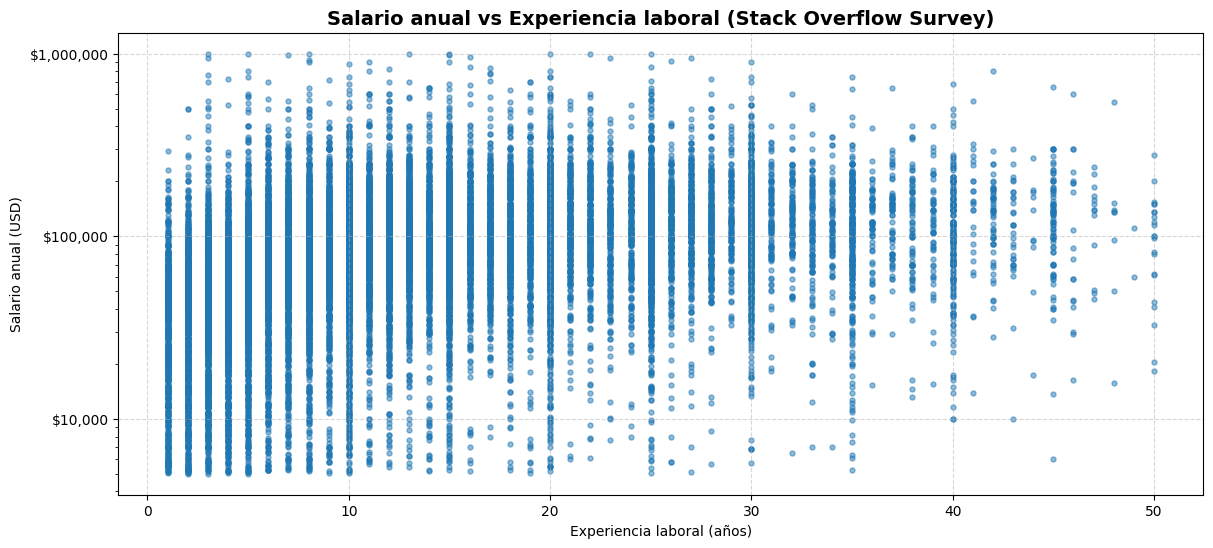

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Cargar datos (ya lo tienes)
df = pd.read_csv('data/stack_overflow.csv', usecols=["ConvertedCompYearly", "WorkExp"])

#pd.set_option('display.max_columns', None)
#print(df.columns.tolist())

# Eliminar filas con valores faltantes
df_clean = df.dropna()

# Opcional: eliminar outliers extremos (ej. salarios > $1M o experiencia > 50 años)
df_clean = df_clean[
    (df_clean['ConvertedCompYearly'] <= 1_000_000) & (df_clean['ConvertedCompYearly'] > 5_000) & (df_clean['WorkExp'] <= 50)
]

# --- Gráfico de dispersión ---
plt.figure(figsize=(14, 6))
plt.scatter(
    df_clean['WorkExp'],
    df_clean['ConvertedCompYearly'],
    alpha=0.5,        # transparencia para ver densidad
    s=13,             # tamaño de los puntos
    color='#1f77b4'   # azul 
)

plt.title("Salario anual vs Experiencia laboral (Stack Overflow Survey)", fontsize=14, weight='bold')
plt.xlabel("Experiencia laboral (años)")
plt.ylabel("Salario anual (USD)")

# Usar escala logarítmica en Y (¡muy recomendado para salarios!)
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.5)

# Formato del eje Y: mostrar $10k, $100k, etc.
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

plt.show()


